# CSC461 – Assignment3 – Machine Learning
## 26-11-2023
## **Muhammad Umar Asif**
## **FA21-BSE-075**

The assignment is about training machine learning models on gender prediction dataset. And apply train/test data split technique and different cross validation techniques.

In [ ]:
#install scikitplot

!pip install scikit-plot

In [56]:
#import libraries

from sklearn import preprocessing
import pandas as pd
import numpy as np

#import different ML classifiers

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#import ML evaluation metrics

from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, StratifiedKFold
from sklearn import metrics, model_selection

#import scikitplot to plot confusion matrix

import scikitplot as skplt

# **Question 1**

In [4]:
# read dataset
df = pd.read_csv("gender-prediction.csv")

## 1. How many instances does the dataset contain?

In [ ]:
df.shape

(110, 8)

The dataset contains 110 instances.

## 2. How many input attributes does the dataset contain?

In [20]:
input_att = df.drop('gender', axis=1)
print("Dataset contains following input attributes:")
print(input_att.columns)
print("\nNumber of input attributes:", len(input_att.columns))

Dataset contains following input attributes:
Index(['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf',
       'eye_color'],
      dtype='object')

Number of input attributes: 7


The dataset contains 7 input attributes and one output attribute is "gender".

## 3. How many possible values does the output attribute have?


In [17]:
print("Input attribute has possible values: ", df["gender"].nunique())

Input attribute has possible values:  2


The output attribute have 2 value.

## 4. How many input attributes are categorical?


In [16]:
input_att = df.drop('gender', axis=1)

# Identify categorical columns
categorical_columns = input_att.select_dtypes(include=['object']).columns

# Print the list of categorical columns and their count
print("Categorical columns:")
print(categorical_columns)
print("\nNumber of categorical columns:", len(categorical_columns))

Categorical columns:
Index(['beard', 'hair_length', 'scarf', 'eye_color'], dtype='object')

Number of categorical columns: 4


## 5. What is the class ratio (male vs female) in the dataset?

In [22]:
ratio = df['gender'].value_counts(normalize=True)
print("Ratio of male vs female:")
print(ratio)

Ratio of male vs female:
male      0.563636
female    0.436364
Name: gender, dtype: float64


# **Question 2**

### Label Encoding

In [50]:
categorical_columns = ['beard', 'hair_length', 'scarf', 'eye_color', 'gender']

for col in categorical_columns:
    df[col] = labels.fit_transform(df[col])

print(df.head(10))

   height  weight  beard  hair_length  shoe_size  scarf  eye_color  gender
0      71     176      1            3         44      0          0       1
1      68     165      0            0         41      0          0       1
2      62     132      0            2         37      1          1       0
3      65     138      0            1         38      0          3       0
4      70     197      1            2         43      0          3       1
5      71     190      1            3         43      0          0       1
6      74     201      1            0         44      0          2       1
7      74     182      0            3         46      0          2       1
8      63     127      0            3         35      0          4       0
9      65     139      0            2         37      1          3       0


In [53]:
x = df.drop('gender', axis=1)
y = df['gender']

## **Part 1: Logistic Regression**

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.95      0.90      0.93        21

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

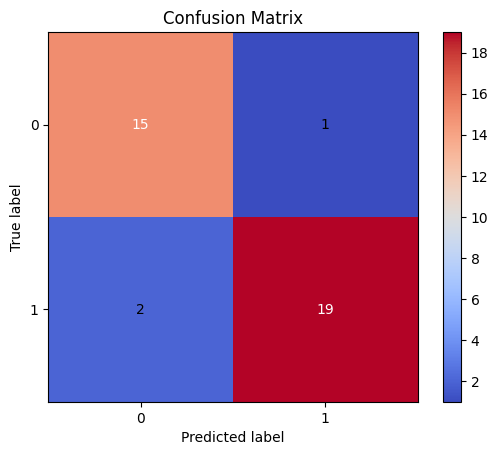

In [54]:
# split data into train 2/3 and test 1/3 ratio using class balanced approach
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify = y)

# train model on training data
model = LogisticRegression(max_iter = 200)
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

### **1. How many instances are incorrectly classified?**
#### As we can see above confusion Matrix, there is 1 false positive and 2 false negative. So model incorrectly classified 3 instances.

### **2. Rerun the experiment using train/test split ratio of 80/20.**


Classification Report:

              precision    recall  f1-score   support

      female       0.91      1.00      0.95        10
        male       1.00      0.92      0.96        12

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

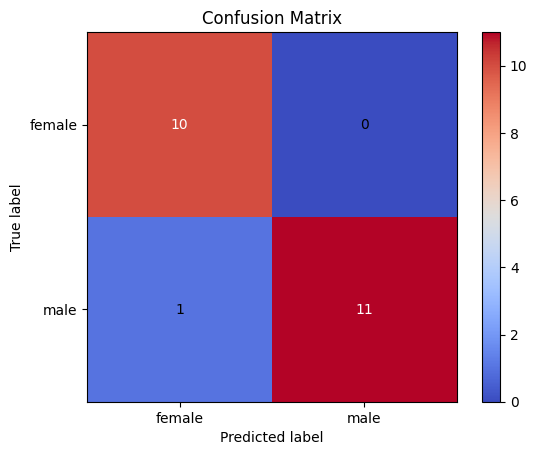

In [16]:
# split data into train/test ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

# train model on training data
model = LogisticRegression(max_iter = 200)
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

### **Do you see any change in the results? Explain.**
#### Logistic Regression Model gives accuracy of 95 train/test split ratios of 80/20. Pression, recall and f1-score are also very good for this split.

### **3. Name 2 attributes that you believe are the most “powerful” in the prediction task. Explain why?**

In [13]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Print or display feature importance
print("Feature Importance:")
print(feature_importance)

Feature Importance:
       Feature  Coefficient
2        beard     1.604980
4    shoe_size     1.103250
3  hair_length     0.957602
0       height     0.429665
1       weight     0.061091
6    eye_color    -0.225567
5        scarf    -0.501867


As we can see that feature importance of **beard** and **shoe_size** are higher than other attributes.

**1. beard**: The presence or absence of a beard might be a strong indicator of gender. Typically, beards are more associated with males, and this attribute might have a significant impact on predictions.

**2. shoe_size**: The shoe_size is often associated with gender stereotypes. Small shoe_size is traditionally associated with females, while large shoe_size is associated with males. This attribute could carry valuable information for gender prediction.

### **4. Try to exclude these 2 attribute(s) from the dataset. Rerun the experiment (using 80/20 train/test split), did you find any change in the results? Explain.**

In [14]:
# Removing beard and shoe_size from
X_New = x.drop(["beard", "shoe_size"], axis=1)
X_New.head(5)

,height,weight,hair_length,scarf,eye_color
0,71,176,3,0,0
1,68,165,0,0,0
2,62,132,2,1,1
3,65,138,1,0,3
4,70,197,2,0,3



Classification Report:

              precision    recall  f1-score   support

      female       0.89      0.80      0.84        10
        male       0.85      0.92      0.88        12

    accuracy                           0.86        22
   macro avg       0.87      0.86      0.86        22
weighted avg       0.87      0.86      0.86        22


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

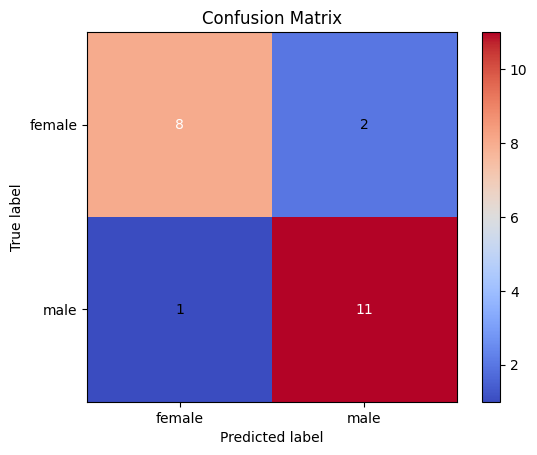

In [17]:
# split data into train/test ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(X_New, y, test_size=0.20, random_state=42, stratify=y)

# train model on training data
model = LogisticRegression(max_iter = 200)
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

As we can see that after removing important attributes the accuracy of model decrease from 95% to 86% and precision, recall and f1-score also decreases.

## **Part 2: Suppoert Vector Machines**


Classification Report:

              precision    recall  f1-score   support

      female       0.88      0.94      0.91        16
        male       0.95      0.90      0.93        21

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

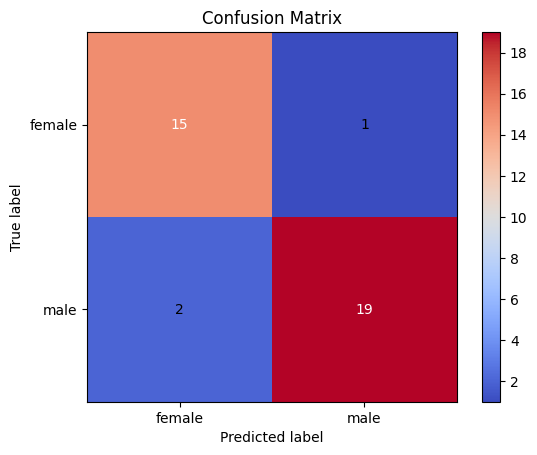

In [24]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify = y)

# train model on training data
model = SVC(kernel='linear')
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

### **1. How many instances are incorrectly classified?**

#### There are 1 false positves and 2 false negatves. Model incorrectly classified 3 instances.

### **2. Rerun the experiment using train/test split ratio of 80/20.**


Classification Report:

              precision    recall  f1-score   support

      female       0.71      1.00      0.83        10
        male       1.00      0.67      0.80        12

    accuracy                           0.82        22
   macro avg       0.86      0.83      0.82        22
weighted avg       0.87      0.82      0.82        22


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

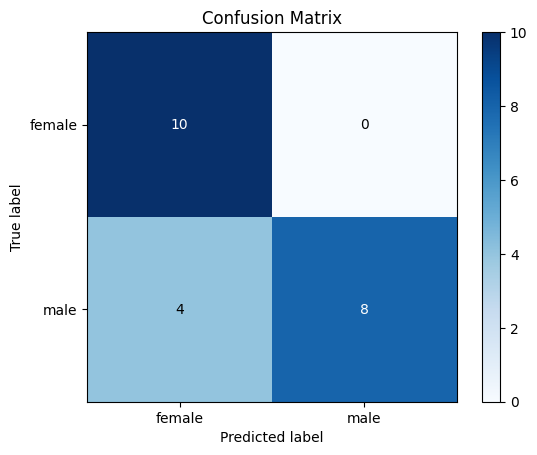

In [38]:
# split data into train/test ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify = y)

# train model on training data
model = SVC(kernel='linear')
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="Blues")


### **Do you see any change in the results? Explain**
As we can see that accuracy of model accuracy decreases with train/test split ratio of 80/20.

### **3. Name 2 attributes that you believe are the most “powerful” in the prediction task. Explain why?**



In [39]:
# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_.ravel()})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

print(feature_importance_df)

       Feature  Coefficient
2        beard     1.737551
3  hair_length     0.785293
4    shoe_size     0.457718
6    eye_color     0.126916
0       height     0.118766
1       weight     0.035466
5        scarf    -0.259559


As we can see that feature importance of beard and hair_length are higher than other attributes.

### **4. Try to exclude these 2 attribute(s) from the dataset. Rerun the experiment (using 80/20 train/test split), did you find any change in the results? Explain.**

In [40]:
# Removing beard and hair_length from
X_New = x.drop(["beard", "hair_length"], axis=1)
X_New.head(5)

,height,weight,shoe_size,scarf,eye_color
0,71,176,44,0,0
1,68,165,41,0,0
2,62,132,37,1,1
3,65,138,38,0,3
4,70,197,43,0,3



Classification Report:

              precision    recall  f1-score   support

      female       0.90      0.90      0.90        10
        male       0.92      0.92      0.92        12

    accuracy                           0.91        22
   macro avg       0.91      0.91      0.91        22
weighted avg       0.91      0.91      0.91        22


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

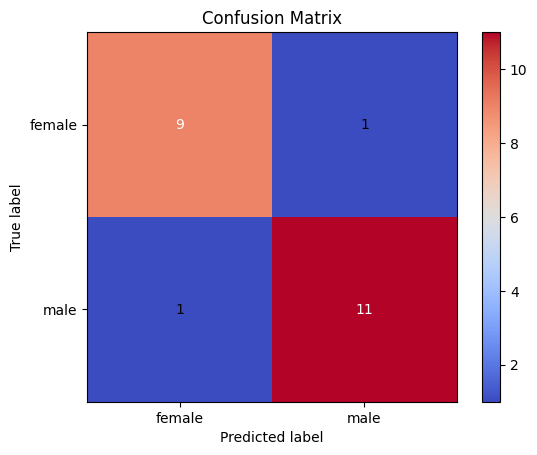

In [42]:
# split data into train/test ratio of 80/20 with X_New
X_train, x_test, Y_train, y_test = train_test_split(X_New, y, test_size=0.20, random_state=42, stratify = y)

# train model on training data
model = SVC(kernel='linear')
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

After excluding hair_lenght and beard from dataset, the model's accuracy and other classification attributes like precision, recall and f1-score also increased.

## **Part 3: MLP Classifier**


Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.90      0.95        21

    accuracy                           0.95        37
   macro avg       0.94      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

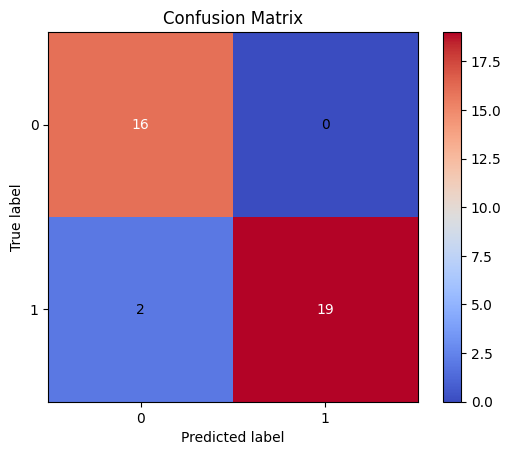

In [162]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify = y)

# train model on training data
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000)
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

### **1. How many instances are incorrectly classified?**

#### There are 0 false positves and 2 false negatves. Model incorrectly classified 2 instances.

### **2. Rerun the experiment using train/test split ratio of 80/20.**


Classification Report:

              precision    recall  f1-score   support

      female       0.91      1.00      0.95        10
        male       1.00      0.92      0.96        12

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

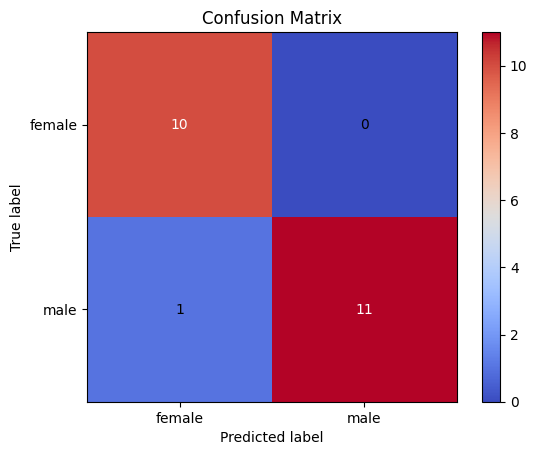

In [107]:
# split data into train/test ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

# train model on training data
model = MLPClassifier(hidden_layer_sizes=(100,),max_iter=2000)
model.fit(X_train,Y_train)

# make prediction on model using test data
prediction = model.predict(x_test)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")


### **Do you see any change in the results? Explain**
As we can see that accuracy of model increases with with train/test split ratio of 80/20. Now model incorrectly classified only one instance.

### **3. Name 2 attributes that you believe are the most “powerful” in the prediction task. Explain why?**



In [108]:
input_layer_weights = model.coefs_[0]

# Calculate the average magnitude of weights for each feature
feature_importance = input_layer_weights.mean(axis=1)

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
       Feature  Coefficient
1       weight     0.061562
5        scarf     0.031935
0       height     0.017773
6    eye_color     0.009995
4    shoe_size     0.004910
3  hair_length    -0.006761
2        beard    -0.016385


From above task, we can say that scarf and weight are powerful attributes in prediction

### **4. Try to exclude these 2 attribute(s) from the dataset. Rerun the experiment (using 80/20 train/test split), did you find any change in the results? Explain.**

In [109]:
# Removing beard and hair_length from
X_New = x.drop(["scarf", "weight"], axis=1)
X_New.head(5)

,height,beard,hair_length,shoe_size,eye_color
0,71,1,3,44,0
1,68,0,0,41,0
2,62,0,2,37,1
3,65,0,1,38,3
4,70,1,2,43,3



Classification Report:

              precision    recall  f1-score   support

      female       0.91      1.00      0.95        10
        male       1.00      0.92      0.96        12

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22


Confusion Matix:



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

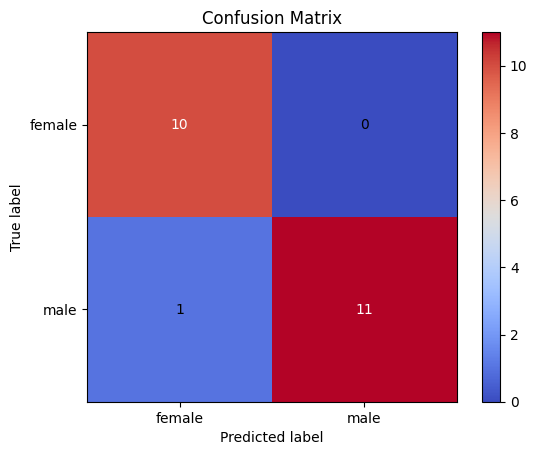

In [112]:
# split data into train/test ratio of 80/20
X_train, x_test, Y_train, y_test = train_test_split(X_New, y, test_size=0.20, random_state=42, stratify = y)

# train model on training data
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000)
model.fit(X_train,Y_train)

# make classification report on model
model_cl_rep = metrics.classification_report(y_test, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
print("\nConfusion Matix:\n")
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

After excluding hair_lenght and beard from dataset,there is not much change in the model's accuracy and other classification attributes like precision, recall and f1-score.

# **Question 3: Apply Random Forest Algorithm**

In [60]:
# Monte Carlo is also known as shuffle split in scikit learn
monte_carlo = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
f1_scorer = make_scorer(f1_score, pos_label=1)

monte_carlo_val = cross_val_score(RandomForestClassifier(n_estimators=100), x, y, cv=monte_carlo, scoring=f1_scorer)

monte_carlo_f1 = round(monte_carlo_val.mean(), 2)
print(monte_carlo_f1)

0.98


In [63]:
# Random forest with leave p out
lpo = StratifiedKFold(n_splits=5)

model = RandomForestClassifier(n_estimators=100)

lpo_f1_scores = []

for train_index, test_index in lpo.split(x,y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate F1 score and store it
    f1 = f1_score(y_test, y_pred)
    lpo_f1_scores.append(f1)

# Calculate the mean F1 score
lpo_f1 = round(np.mean(lpo_f1_scores), 2)

# Print the results
print("F1 scores:\n")
print("Monte Carlo: ", monte_carlo_f1)
print("Leave p out: ", lpo_f1)

F1 scores:

Monte Carlo:  0.98
Leave p out:  0.96


## **Question 4**
### **Gaussian Naïve Bayes classification algorithm**

In [135]:
# read new 10 instances dataset
df_new = pd.read_csv("new-gender-prediction.csv")
df_new.head(10)

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,64,165,no,bald,40,no,brown,male
1,70,115,yes,medium,42,no,black,male
2,72,168,no,medium,42,no,black,male
3,65,121,no,medium,39,yes,blue,female
4,66,150,yes,short,41,no,green,male
5,63,110,no,long,37,no,black,female
6,70,181,yes,medium,45,no,blue,male
7,65,119,no,medium,37,yes,green,female
8,68,154,yes,short,43,no,brown,male
9,64,128,no,long,40,yes,brown,female


In [158]:
# transforming categorical instances into numerical
x_new = df_new.drop('gender', axis=1)
y_new = df_new['gender']

labels = preprocessing.LabelEncoder()
y_new = labels.fit_transform(y_new)

categorical_columns = ['beard', 'hair_length', 'scarf', 'eye_color']

for col in categorical_columns:
    x_new[col] = labels.fit_transform(x_new[col])


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

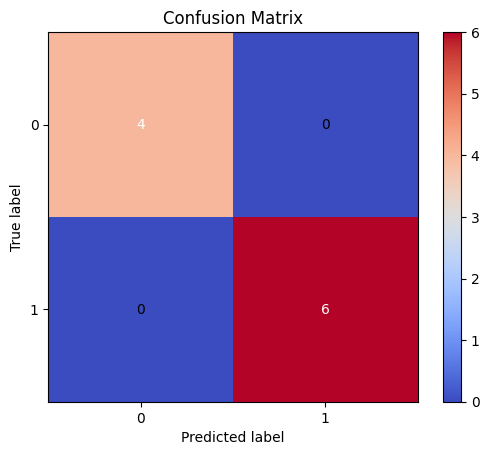

In [159]:
# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model using comlete dataset
model.fit(x, y)

# make prediction on model using test data of new 10 instances
prediction = model.predict(x_new)

# make classification report on model
model_cl_rep = metrics.classification_report(y_new, prediction)
print("\nClassification Report:\n")
print(model_cl_rep)

#draw confusion matrix using sci-kit plot
skplt.metrics.plot_confusion_matrix(y_new, prediction, normalize=False, title="Confusion Matrix", cmap="coolwarm")

accuracy = 100%

precision = 1

recall = 1

f1-score = 1